### Feature Selection?
#### Data collected will not be clean, like same type of data will be present in our dataset with different features,"Duplicate Features"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
b=df.iloc[:,1:10]
b.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores
0,0,2.2,0,1,0,7,0.6,188,2
1,1,0.5,1,0,1,53,0.7,136,3
2,1,0.5,1,2,1,41,0.9,145,5
3,1,2.5,0,0,0,10,0.8,131,6
4,1,1.2,0,13,1,44,0.6,141,2


In [6]:
a=df.drop('battery_power',axis=1)

### Univariate Selection

In [8]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [9]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
best_feature=SelectKBest(score_func=chi2,k=10)# we use chi square as score function and select best 10 feature
best_feature.fit(X,y)

SelectKBest(score_func=<function chi2 at 0x0000026177BA1A20>)

In [12]:
best_feature.get_support()

array([ True, False, False, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [13]:
X.columns[best_feature.get_support()]

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

In [14]:
df_score=pd.DataFrame(best_feature.scores_,columns=['Score'])
df_score['Features']=X.columns
df_score

,Score,Features
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [15]:
df_score.nlargest(10,'Score')

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


### ---------------------------------------------------------------------------------------------------------

### Feature Importance using ExtraTreeClassifier

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.05955253 0.02086514 0.03358116 0.02028196 0.03308405 0.01814632
 0.03646712 0.03375896 0.03579289 0.03332828 0.03426097 0.04738092
 0.04801841 0.38922087 0.03440962 0.03457685 0.03478017 0.01436749
 0.01908307 0.01904323]


<Axes: >

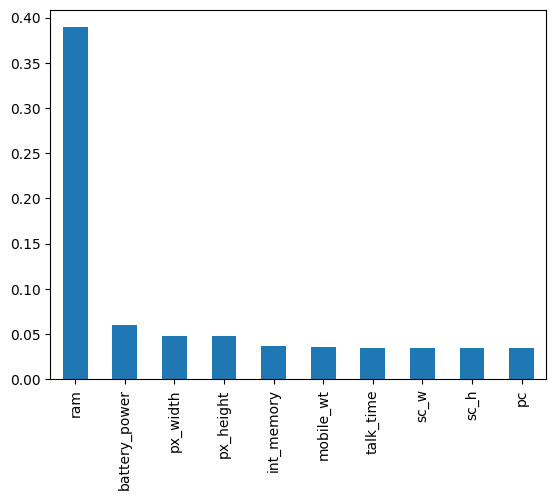

In [18]:
ranked_feature=pd.Series(model.feature_importances_,index=X.columns)
ranked_feature.nlargest(10).plot(kind='bar')

### ---------------------------------------------------------------------------------------------------------

### Selection using Correlation

In [19]:
#code for selection selecting features according to 
def correlation(dataset,threshold):
    col_corr=set() # set of all  the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # wheather this correlation coefficient value is greater than our defined value
                colname=corr_matrix.columns[i]#store that column name
                col_corr.add(colname)#add that column name to set to avoid duplicates
    return col_corr

In [20]:
corr=df.corr()#correlation matrix of dataframe
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

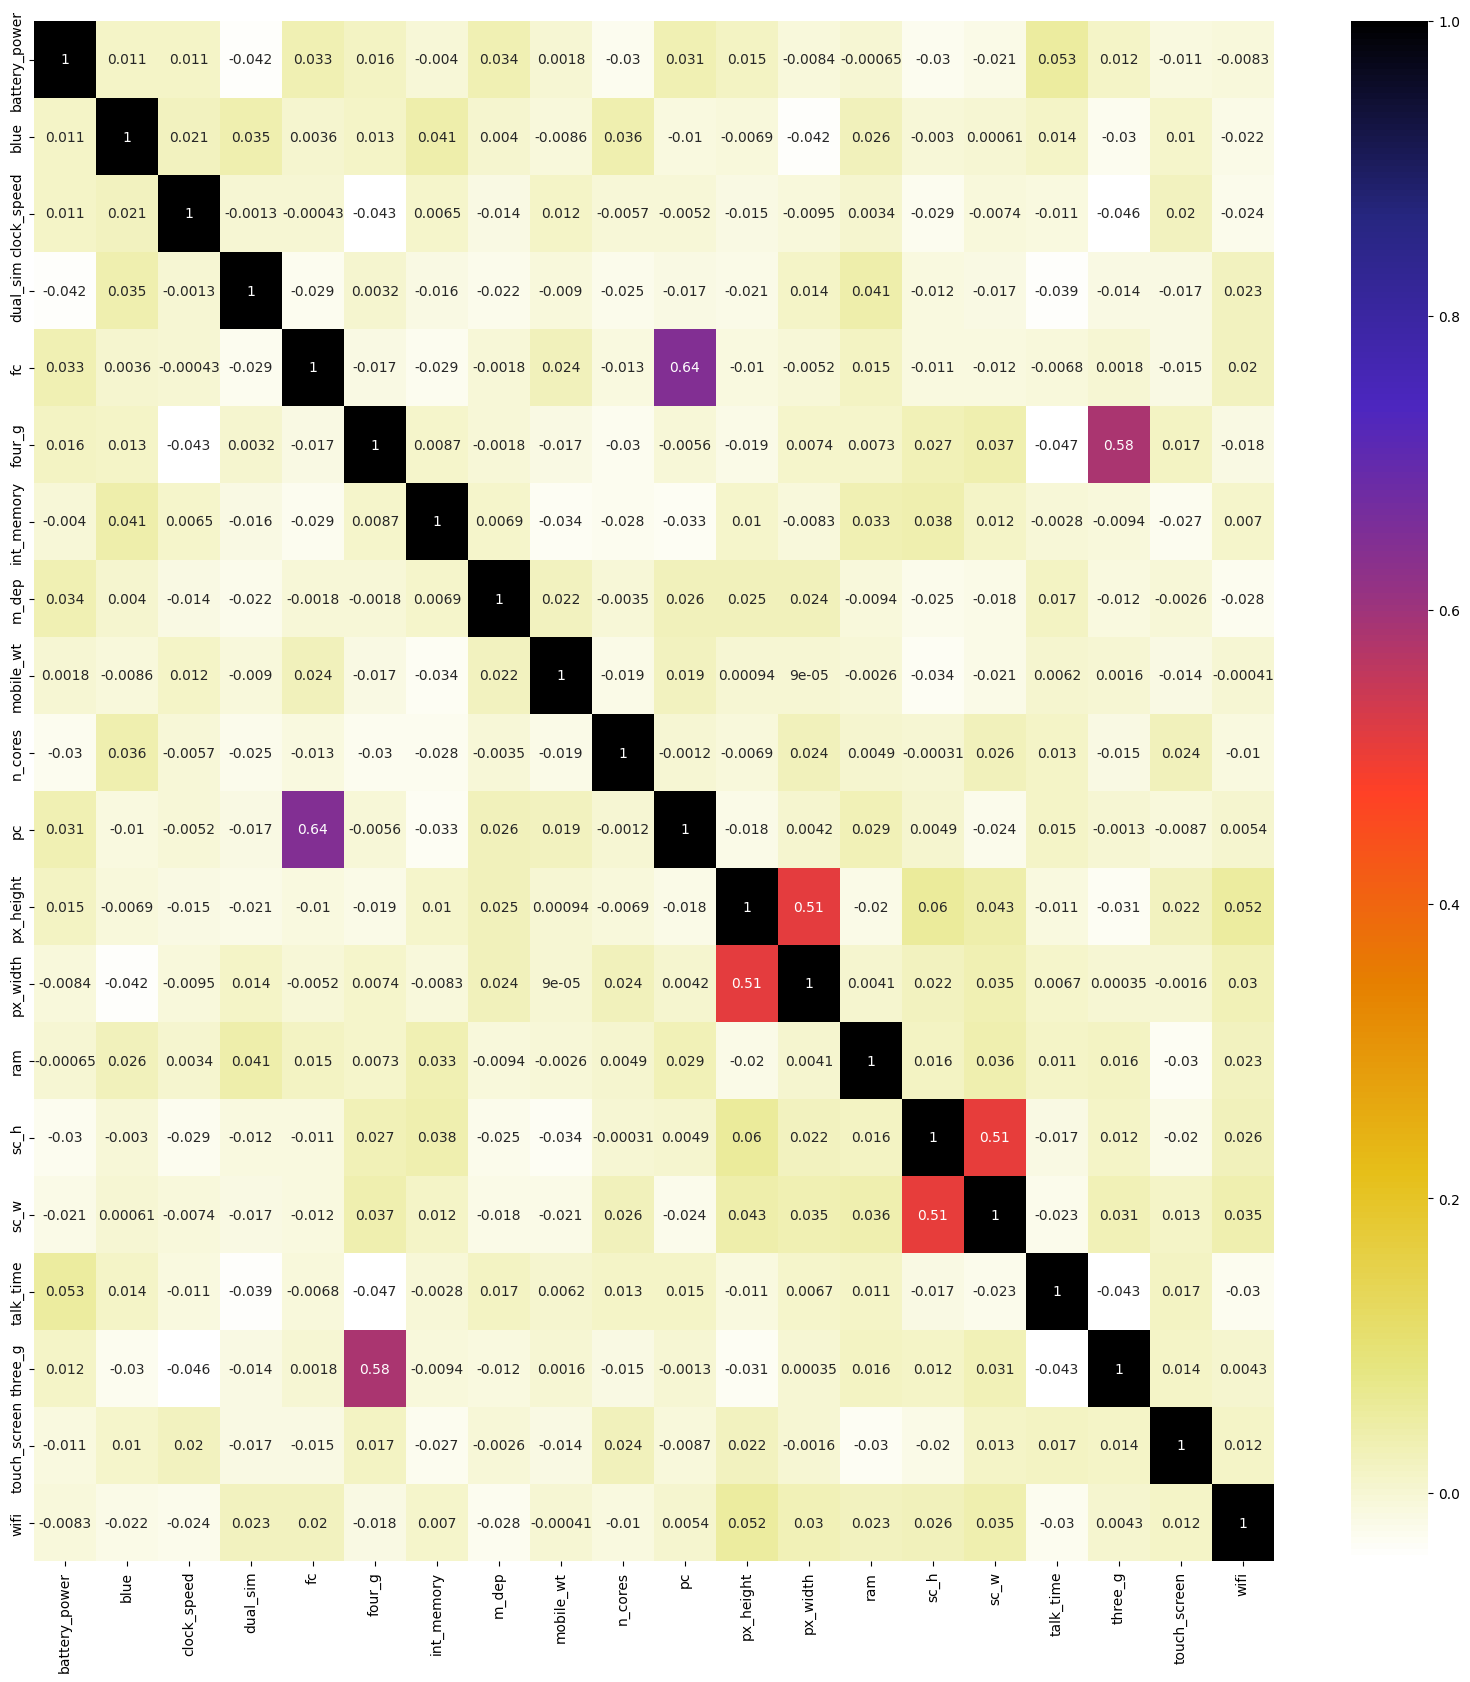

In [21]:
top_features=corr.index
top_features=top_features.drop('price_range')
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True,cmap=plt.cm.CMRmap_r )

### Remove the correlated

In [22]:
#code for selection selecting features according to 
def correlation(dataset,threshold):
    col_corr=set() # set of all  the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # wheather this correlation coefficient value is greater than our defined value
                colname=corr_matrix.columns[i]#store that column name
                col_corr.add(colname)#add that column name to set to avoid duplicates
    return col_corr

In [23]:
a=df.drop('price_range',axis=1)
correlation(a,0.5)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [24]:
len(df.corr().columns)

21

In [25]:
a=df.corr()
a.iloc[0,0]

1.0

### Using Information Gain

In [26]:
from sklearn.feature_selection import mutual_info_classif

In [27]:
mutual_info=mutual_info_classif(X,y)

In [28]:
mutual=pd.Series(mutual_info)
mutual.index=X.columns
mutual.sort_values(ascending=False)

ram              0.848212
px_width         0.031990
px_height        0.025867
battery_power    0.021492
touch_screen     0.014550
mobile_wt        0.012431
fc               0.011843
int_memory       0.011196
clock_speed      0.010203
talk_time        0.008205
sc_h             0.004845
n_cores          0.004370
m_dep            0.001802
four_g           0.000837
three_g          0.000000
pc               0.000000
sc_w             0.000000
blue             0.000000
dual_sim         0.000000
wifi             0.000000
dtype: float64

In [29]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### Recursive Feature Elimnation
### ---------------------------------------

In [30]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier()
tree1.fit(X,y)

DecisionTreeClassifier()

In [31]:
tree2=DecisionTreeClassifier()

In [32]:
selector = RFE(tree2, n_features_to_select=10)
selector.fit(X, y)


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [33]:
a=X.columns[selector.get_support()]
a

Index(['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt',
       'pc', 'px_height', 'px_width', 'ram', 'sc_w'],
      dtype='object')

### Principal Component Analysis
### **********************************



In [68]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [69]:
iris = load_iris()
X = iris.data
y = iris.target

In [70]:
pca = PCA(n_components=2)

In [71]:
X_pca=pca.fit_transform(X, y)

In [72]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [74]:
X_pca.shape

(150, 2)

In [ ]:
pca

In [73]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

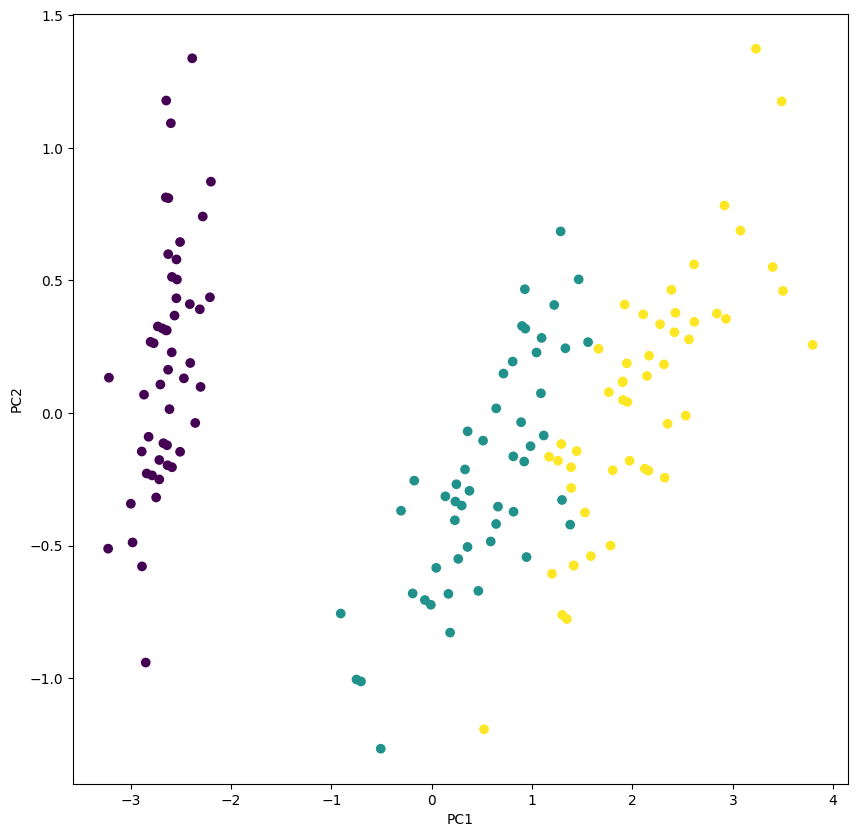

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.show()

In [42]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [43]:
from sklearn.datasets import load_breast_cancer

In [45]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [47]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [94]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [97]:
pca.fit(scaled_data)

PCA(n_components=2)

In [98]:
x_pca=pca.transform(scaled_data)

In [99]:
scaled_data.shape

(569, 30)

In [100]:
x_pca.shape

(569, 2)

In [104]:
x_comp=pca.components_

In [109]:
def col_name(v):
    res=[]
    for i in range(len(v)):
        res.append(v[i].argmax()+1)
    return res

In [110]:
col_name(x_comp)

[8, 10]

In [106]:
x_comp[0].argmax()

7

In [67]:
x_pca.shape

(569, 2)

In [61]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

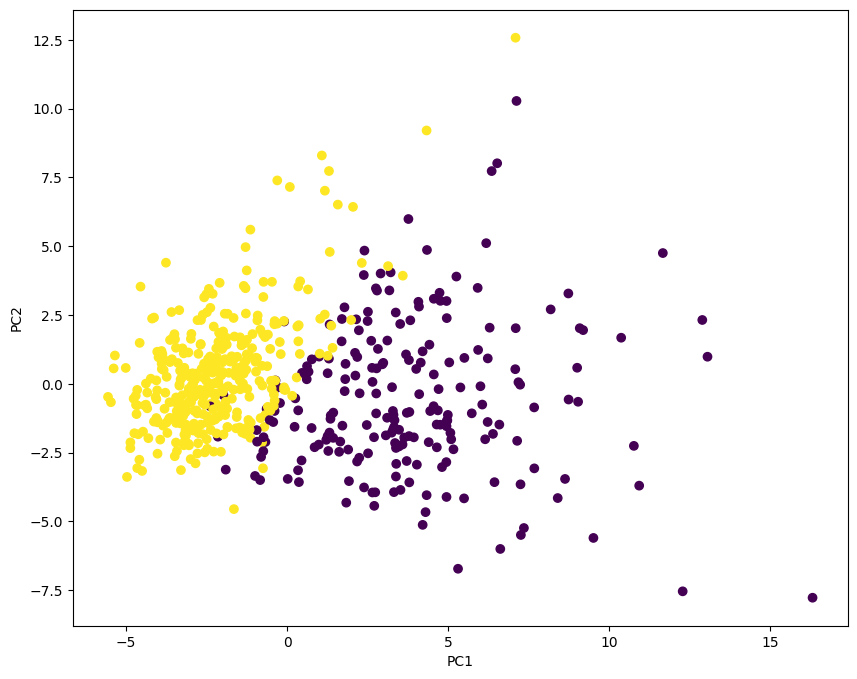

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [75]:
X = np.array([[170, 70, 25, 50000],
              [160, 60, 30, 60000],
              [180, 80, 20, 70000],
              [165, 55, 35, 45000]])
pca.fit(X)

PCA(n_components=2)

In [79]:
v=pca.components_

In [78]:
a=['age','price','power','cc']

In [77]:
df=pd.read_csv('pcatest.csv')
df

,Age,price,power,cc
0,25,50000,70,170
1,30,60000,60,160
2,20,70000,80,180
3,35,450000,55,165


In [86]:
v

array([[ 4.23729161e-04,  7.28813847e-04, -4.40678095e-04,
         9.99999548e-01],
       [-6.23679122e-01, -6.92172247e-01,  3.63209404e-01,
         9.28794598e-04]])

In [89]:
print(v[1].max())

0.36320940449752465


In [93]:
res=[]
for i in range(len(v)):
    for j in range(len(v[i])):
        if v[i][j]==v[i].max():
            res.append(j+1)
res

[4, 3]